# Лабораторна робота №3
### Студентки групи МІТ-31 (підгрупа 1)
### Борук Дарини Ігорівни

#### Part1

Performance evaluation:
* Accuracy: 0.94
* Recall: 0.94
* F1-Score: 0.94
* AUC-ROC: 0.99

Size of y_test: 200
* Confusion Matrix:


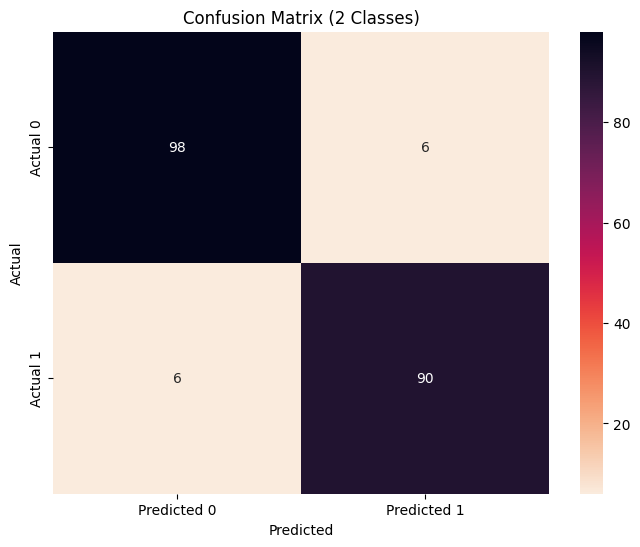

* ROC Curve:


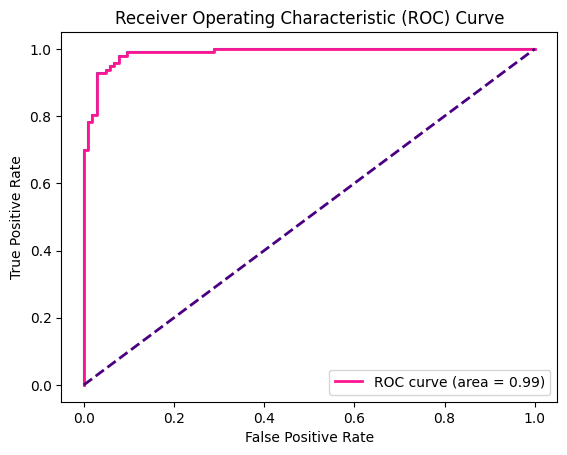

In [202]:
import pandas as pd
from sklearn.datasets import make_classification
num_samples=1000
num_features=2

X, y = make_classification(
    n_samples=num_samples,
    n_features=num_features,
    n_informative=2,
    n_redundant=0,
    n_classes=2, 
    random_state=13
)

data = pd.DataFrame(X, columns = [f"Feature{i+1}" for i in range(num_features)])
data['Target'] = y

data.to_csv('binary_classification.csv', index=False)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
conf_matrix = confusion_matrix(y_test, y_pred)

print("Performance evaluation:")
print("* Accuracy: {:.2f}".format(accuracy))
print("* Recall: {:.2f}".format(recall))
print("* F1-Score: {:.2f}".format(f1))
print("* AUC-ROC: {:.2f}".format(roc_auc))


#confusion matrix gives us only 200 values in sum because we are comparing the predictions made on the 20% of the data reserved for testing, not the entire dataset
print("\nSize of y_test:", len(y_test))
print("* Confusion Matrix:")
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket_r',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (2 Classes)')
plt.show()

print("* ROC Curve:")

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, color='deeppink', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='indigo', lw=2, linestyle='--')
plt.legend(loc='lower right')
plt.show()

#### Part2

Performance evaluation for RandomForestClassifier:

* Accuracy: 0.72
* Recall: 0.72
* F1-Score: 0.73
* Confusion Matrix:


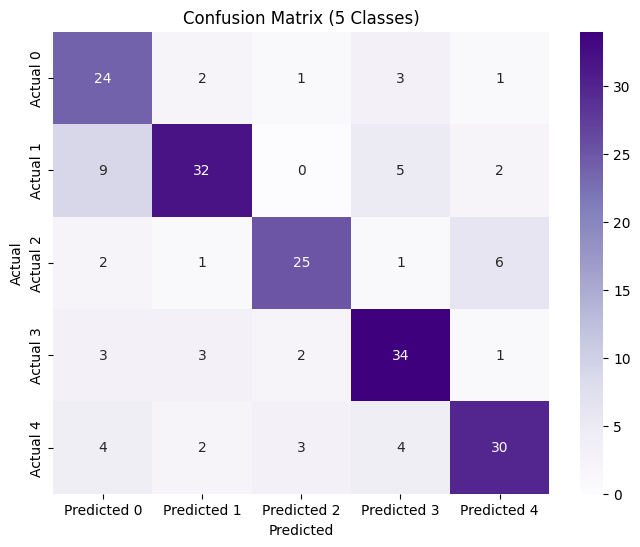



Performance evaluation for SVC:

* Accuracy: 0.69
* Recall: 0.69
* F1-Score: 0.69
* Confusion Matrix:


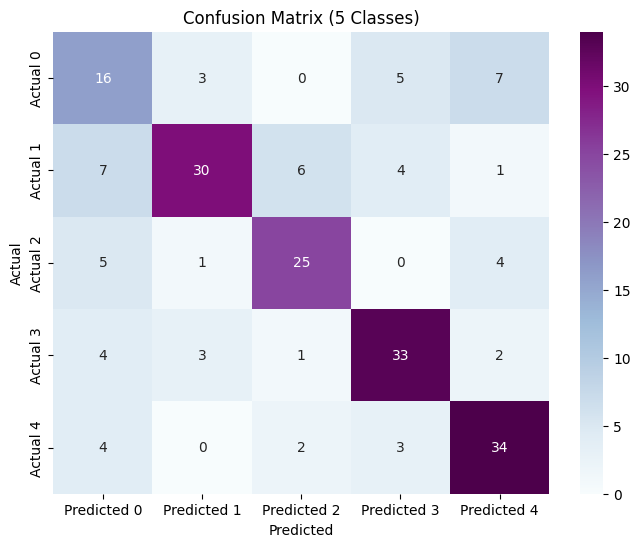



Performance evaluation for LogisticRegression:

* Accuracy: 0.67
* Recall: 0.67
* F1-Score: 0.67
* Confusion Matrix:


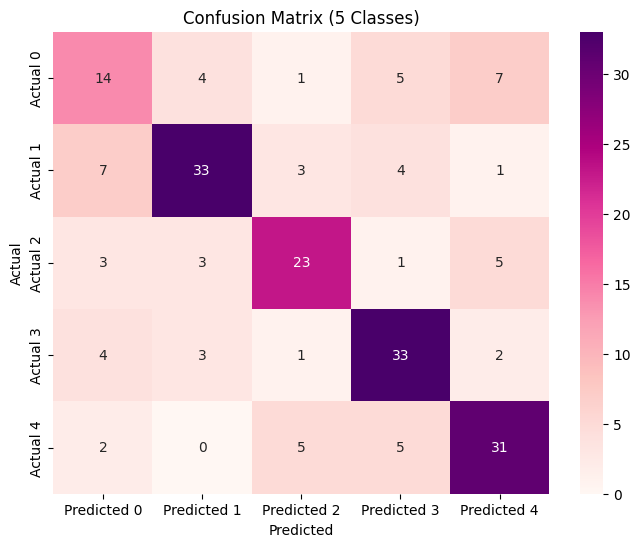

In [203]:
import pandas as pd
from sklearn.datasets import make_classification
num_samples=1000
num_features=7

X, y = make_classification(
    n_samples=num_samples,
    n_features=num_features,
    n_informative=4,
    n_classes=5, 
    random_state=13
)

data = pd.DataFrame(X, columns = [f"Feature{i+1}" for i in range(num_features)])
data['Target'] = y

data.to_csv('multiclass_classification.csv', index=False)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(random_state=13)
model_rfc.fit(X_train, y_train)

y_pred_rfc = model_rfc.predict(X_test)


from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc, average="weighted")
f1_rfc = f1_score(y_test, y_pred_rfc, average="weighted")
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

print("Performance evaluation for RandomForestClassifier:\n")
print("* Accuracy: {:.2f}".format(accuracy_rfc))
print("* Recall: {:.2f}".format(recall_rfc))
print("* F1-Score: {:.2f}".format(f1_rfc))
print("* Confusion Matrix:")
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rfc, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'],
            yticklabels=['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (5 Classes)')
plt.show()

#----------------------------------------------------------------------------------------------------

from sklearn.svm import SVC
model_svc = SVC(kernel='linear')
model_svc.fit(X_train, y_train)

y_pred_svc = model_svc.predict(X_test)


from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix
accuracy_svc = accuracy_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc, average="weighted")
f1_svc = f1_score(y_test, y_pred_svc, average="weighted")
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

print("\n\nPerformance evaluation for SVC:\n")
print("* Accuracy: {:.2f}".format(accuracy_svc))
print("* Recall: {:.2f}".format(recall_svc))
print("* F1-Score: {:.2f}".format(f1_svc))
print("* Confusion Matrix:")
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='BuPu',
            xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'],
            yticklabels=['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (5 Classes)')
plt.show()

#----------------------------------------------------------------------------------------------------

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)


from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix
accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr, average="weighted")
f1_lr = f1_score(y_test, y_pred_lr, average="weighted")
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print("\n\nPerformance evaluation for LogisticRegression:\n")
print("* Accuracy: {:.2f}".format(accuracy_lr))
print("* Recall: {:.2f}".format(recall_lr))
print("* F1-Score: {:.2f}".format(f1_lr))
print("* Confusion Matrix:")
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='RdPu',
            xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'],
            yticklabels=['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (5 Classes)')
plt.show()

* Загалом для кожного класифікатора оцінка метрик є майже однаковою і досить непоганою. По результатам виконання коду можемо побачити, що RandomForestClassifier має кращі результати ніж SVC і LogisticRegression. Він забезпечує гарний баланс між точністю та відгуком. SVC і LogisticRegression мають однакову продуктивність, причому SVC трохи випереджає LogisticRegression за точністю, відгуком і оцінкою F1.
* При виборі класифікатора важливо враховувати конкретні вимоги проблеми, що розглядається. Якщо баланс між точністю та запам’ятовуванням є вирішальним, RandomForestClassifier може бути кращим вибором у цьому сценарії. Метод опорних векторів (SVC) добре підходить для завдань з двома чітко визначеними класами, а логістична регресія (LogisticRegression) є однією з найпоширеніших моделей для бінарної та мультикласової класифікації.

#### Part3

In [204]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('always')

data = pd.read_csv('multilabel_classification.csv')

label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

data.fillna(data.mean(), inplace=True)

X = data[['gender', 'masterCategory', 'subCategory', 'baseColour']]
y = data[['articleType', 'season', 'usage']]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
model = MultiOutputClassifier(RandomForestClassifier(random_state=13))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import precision_score, recall_score, f1_score
# Iterate through each label separately
for i in range(y_test.shape[1]):
    label = y_test.columns[i]
    precision = precision_score(y_test[label], y_pred[:, i], average='weighted', zero_division=0.0)
    recall = recall_score(y_test[label], y_pred[:, i], average='weighted', zero_division=0.0)
    f1 = f1_score(y_test[label], y_pred[:, i], average='weighted', zero_division=0.0)

    print("\nPerformance evaluation for label '{}':".format(label))
    print("* Precision: {:.2f}".format(precision))
    print("* Recall: {:.2f}".format(recall))
    print("* F1-Score: {:.2f}".format(f1))





Performance evaluation for label 'articleType':
* Precision: 0.57
* Recall: 0.62
* F1-Score: 0.58

Performance evaluation for label 'season':
* Precision: 0.66
* Recall: 0.66
* F1-Score: 0.65

Performance evaluation for label 'usage':
* Precision: 0.78
* Recall: 0.81
* F1-Score: 0.77


* Label 'articleType':
F1-Score (0,58) для 'articleType' свідчить про те, що здатність моделі збалансувати точність і відгук для цієї мітки відносно низька. Це може свідчити про проблеми у коректності ідентифікації та класифікації екземплярів, що належать до категорії «articleType». Щоб підвищити продуктивність, можливо, знадобиться розробити більше функцій, зібрати більше різноманітних даних, пов’язаних із «articleType», або поекспериментувати з різними алгоритмами, які добре обробляють незбалансовані дані.
* Label 'season':
F1-Score (0,65) для 'season' вказує на відносно кращу продуктивність порівняно з 'articleType'. Проте ще є місце для вдосконалення. Подібні стратегії, згадані для 'articleType', такі як вивчення різних функцій або алгоритмів, можуть бути застосовані і для підвищення точності моделі в передбаченні мітки 'season'.
* Label 'usage:
Позначка 'usage' показує найкращу продуктивність із F1-Score 0,77. Це свідчить про те, що модель відносно добре прогнозує випадки, пов’язані саме з 'usage'. Однак можуть існувати способи подальшого тонкого налаштування моделі, наприклад експериментування з гіперпараметрами або проведення детального аналізу неправильно класифікованих екземплярів для виявлення шаблонів для вдосконалення.
* Загалом, продуктивність моделі в контексті мультилейбл класифікації залежить від комбінації якості даних, вибору функцій та алгоритму, дисбалансу класів, налаштування гіперпараметрів і детального аналізу помилок. Систематично розглядаючи ці фактори, можна підвищити ефективність моделі для різних лейблів.